#引用tensorflow

將 x 都設定為0

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


將 x 都設定為



In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


#利用tensor裡的random測試

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.2233641 ]
 [ 0.89637905]
 [ 0.5310904 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.29217863]
 [0.2796365 ]
 [0.00373244]], shape=(3, 1), dtype=float32)


#numpy 的 array

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

# tensor 的 variable

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.39653996],
       [0.9502102 ],
       [0.22504653]], dtype=float32)>


# assign 一個值給 v

In [7]:
v.assign(tf.ones((3, 1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
v[0, 0].assign(3.)


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v.assign_add(tf.ones((3, 1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

# basic math operarion

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


#GradientTape in tensorflow

In [40]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

#GradientTape with tensor input

In [41]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [64]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


#產生 2個 sample

In [43]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [44]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

inputs

array([[ 0.8214922 ,  3.1263676 ],
       [-0.6890759 ,  2.7258422 ],
       [-0.25763926,  3.3080473 ],
       ...,
       [ 2.507901  ,  0.3951128 ],
       [ 1.9790527 , -0.25049907],
       [ 2.2415578 ,  0.3828718 ]], dtype=float32)

In [45]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

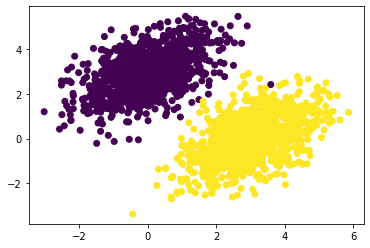

In [46]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [47]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# forward pass function

In [48]:
def model(inputs):
    return tf.matmul(inputs, W) + b

# Means quare error loss function

In [49]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# training step function

In [50]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# batch function

In [51]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.1437
Loss at step 1: 0.2456
Loss at step 2: 0.1269
Loss at step 3: 0.1067
Loss at step 4: 0.0984
Loss at step 5: 0.0919
Loss at step 6: 0.0861
Loss at step 7: 0.0809
Loss at step 8: 0.0760
Loss at step 9: 0.0716
Loss at step 10: 0.0676
Loss at step 11: 0.0639
Loss at step 12: 0.0605
Loss at step 13: 0.0574
Loss at step 14: 0.0546
Loss at step 15: 0.0520
Loss at step 16: 0.0497
Loss at step 17: 0.0475
Loss at step 18: 0.0455
Loss at step 19: 0.0437
Loss at step 20: 0.0421
Loss at step 21: 0.0406
Loss at step 22: 0.0392
Loss at step 23: 0.0379
Loss at step 24: 0.0368
Loss at step 25: 0.0357
Loss at step 26: 0.0347
Loss at step 27: 0.0339
Loss at step 28: 0.0331
Loss at step 29: 0.0323
Loss at step 30: 0.0316
Loss at step 31: 0.0310
Loss at step 32: 0.0305
Loss at step 33: 0.0299
Loss at step 34: 0.0295
Loss at step 35: 0.0290
Loss at step 36: 0.0286
Loss at step 37: 0.0283
Loss at step 38: 0.0279
Loss at step 39: 0.0276


#result

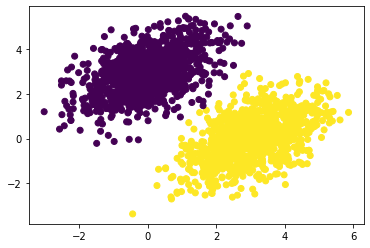

In [52]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

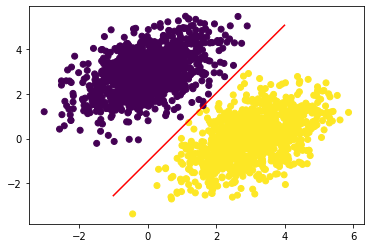

In [53]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Deep learing 
# The base layer in keras

In [54]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

#Dense 設定

In [32]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#built layer

In [55]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [56]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [57]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

# compile the model
# Layer to model

In [58]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [59]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 21.9229 - accuracy: 0.0035
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 21.3601 - accuracy: 0.0035
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 20.8789 - accuracy: 0.0035
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 20.4097 - accuracy: 0.0035
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 19.9513 - accuracy: 0.0035


#The history of training

In [60]:
history.history

{'loss': [21.92290687561035,
  21.360130310058594,
  20.878925323486328,
  20.409679412841797,
  19.951309204101562],
 'accuracy': [0.0035000001080334187,
  0.0035000001080334187,
  0.0035000001080334187,
  0.0035000001080334187,
  0.0035000001080334187]}

#Use validation date to predict 

In [61]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
# train
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)


Epoch 1/5
88/88 [==============================] - 1s 7ms/step - loss: 0.2165 - binary_accuracy: 0.9086 - val_loss: 0.2061 - val_binary_accuracy: 0.9567
Epoch 2/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0781 - binary_accuracy: 0.9514 - val_loss: 0.0252 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0721 - binary_accuracy: 0.9593 - val_loss: 0.0459 - val_binary_accuracy: 0.9833
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0731 - binary_accuracy: 0.9507 - val_loss: 0.0479 - val_binary_accuracy: 0.9900
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0654 - binary_accuracy: 0.9671 - val_loss: 0.1162 - val_binary_accuracy: 0.8733


#print the predict result

In [62]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.6859342 ]
 [0.85584366]
 [0.29685634]
 [0.3568816 ]
 [0.8317287 ]
 [0.82971144]
 [0.5451761 ]
 [0.84187996]
 [0.79767436]
 [0.49485293]]
